In [38]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [39]:
healthcare = pd.read_csv('/Users/Chengxin/Desktop/All/Project_Portfolio/Healthcare/Healthcare Analysis/healthcare_dataset.csv')
healthcare.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,haley perkins,63,Female,A+,Arthritis,6/23/20,Erica Spencer,Cervantes-Wells,UnitedHealthcare,24499.847904,114,Elective,7/14/20,Paracetamol,Normal
1,KatHRYn StewArt,58,Female,O+,Diabetes,5/12/22,Vanessa Newton,Clark-Mayo,Aetna,5998.102908,327,Urgent,6/10/22,Lipitor,Inconclusive
2,JAmES pattERson,23,Female,A+,Arthritis,11/3/19,Kristina Frazier,Cruz-Santiago,UnitedHealthcare,25835.323595,108,Urgent,11/29/19,Penicillin,Abnormal
3,WilLIAM cOOPEr,78,Male,AB-,Diabetes,5/18/23,John Hartman,Group Duncan,Medicare,17993.226200,245,Elective,6/15/23,Penicillin,Normal
4,Erica myERS,19,Female,A+,Arthritis,1/30/20,Ian Benitez,"Jackson and Lane, Dillon",Medicare,20227.863727,241,Elective,2/12/20,Penicillin,Normal


## Approach

In [40]:
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54853 entries, 0 to 54852
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                54853 non-null  object 
 1   Age                 54853 non-null  int64  
 2   Gender              54853 non-null  object 
 3   Blood Type          54853 non-null  object 
 4   Medical Condition   54853 non-null  object 
 5   Date of Admission   54853 non-null  object 
 6   Doctor              54853 non-null  object 
 7   Hospital            54853 non-null  object 
 8   Insurance Provider  54853 non-null  object 
 9   Billing Amount      54853 non-null  float64
 10  Room Number         54853 non-null  int64  
 11  Admission Type      54853 non-null  object 
 12  Discharge Date      54853 non-null  object 
 13  Medication          54853 non-null  object 
 14  Test Results        54853 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.3

In [41]:
healthcare.shape

(54853, 15)

In [42]:
# Check for NULL values
healthcare.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [43]:
# Check for duplicates
healthcare.duplicated().sum()

497

In [44]:
# Drop duplicates
healthcare = healthcare.drop_duplicates()
healthcare.shape

(54356, 15)

In [45]:
# Format Date of Admission and Discharge Date to datetime
for date in ['Date of Admission','Discharge Date']:
    healthcare[date] = pd.to_datetime(healthcare[date])
    
# Number of days patients got admitted in hospital
healthcare['Days Hospitalized'] = (healthcare['Discharge Date'] - healthcare['Date of Admission']).dt.days
#healthcare['Days Hospitalized'] = healthcare['Days Hospitalized'].astype(int)

In [46]:
# Drop columns irrelevant to analysis
healthcare = healthcare.drop(columns = ['Name','Date of Admission','Discharge Date','Room Number'])
healthcare.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Admission Type',
       'Medication', 'Test Results', 'Days Hospitalized'],
      dtype='object')

In [47]:
# Filter data without negative billing amount.
healthcare = healthcare[healthcare['Billing Amount']>=0]

In [48]:
healthcare.describe()

,Age,Billing Amount,Days Hospitalized
count,54253.000000,54253.000000,54253.000000
mean,51.541887,25597.055844,16.206551
std,19.607562,14173.537187,9.980266
min,13.000000,23.727930,1.000000
25%,35.000000,13306.162972,8.000000
50%,52.000000,25595.069800,16.000000
75%,68.000000,37850.378393,23.000000
max,89.000000,52764.276736,50.000000


In [49]:
healthcare.describe(include = 'O')

,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Admission Type,Medication,Test Results
count,54253,54253,54253,54253,54253,54253,54253,54253,54253
unique,2,8,6,39869,39410,5,3,5,3
top,Male,A-,Diabetes,Michael Smith,LLC Smith,Cigna,Elective,Ibuprofen,Abnormal
freq,28335,6800,11384,25,44,10986,19298,10897,18211


### DATA EXPLORATION AND VISUALIZATION

In [50]:
# Distribution of data for categorical columns
for col in healthcare.columns:
    if healthcare[col].dtype == 'O' and col != 'Doctor' and col!= 'Hospital':
        print(healthcare[col].value_counts())
        print('----------')

Male      28335
Female    25918
Name: Gender, dtype: int64
----------
A-     6800
AB+    6800
A+     6799
B+     6794
AB-    6791
B-     6769
O+     6767
O-     6733
Name: Blood Type, dtype: int64
----------
Diabetes        11384
Hypertension    10403
Cancer           8830
Arthritis        8306
Asthma           8091
Obesity          7239
Name: Medical Condition, dtype: int64
----------
Cigna               10986
Medicare            10896
UnitedHealthcare    10863
Blue Cross          10828
Aetna               10680
Name: Insurance Provider, dtype: int64
----------
Elective     19298
Urgent       18130
Emergency    16825
Name: Admission Type, dtype: int64
----------
Ibuprofen      10897
Lipitor        10884
Aspirin        10850
Penicillin     10813
Paracetamol    10809
Name: Medication, dtype: int64
----------
Abnormal        18211
Normal          18086
Inconclusive    17956
Name: Test Results, dtype: int64
----------


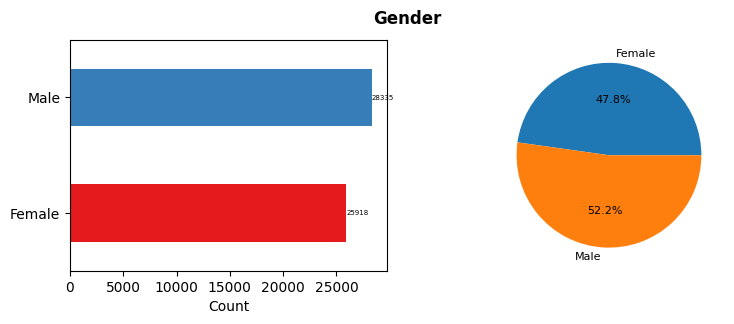

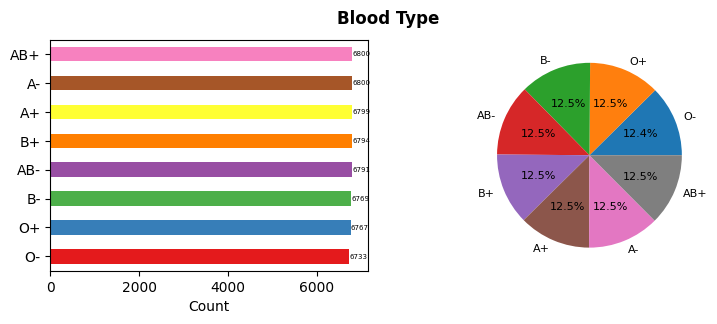

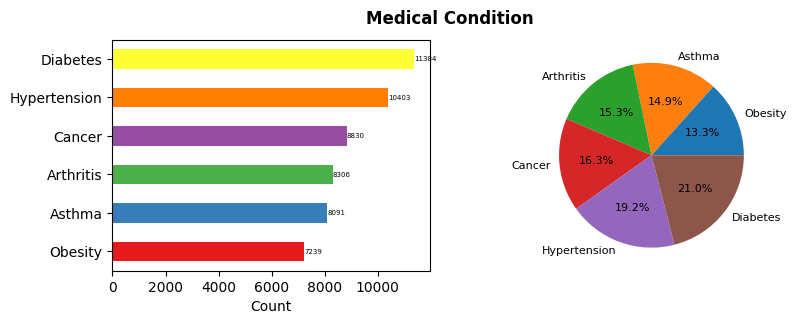

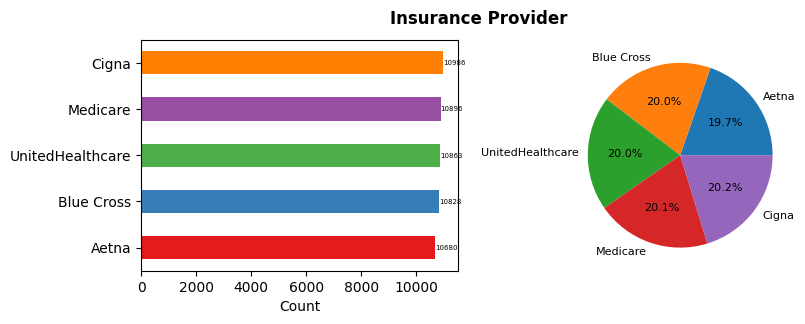

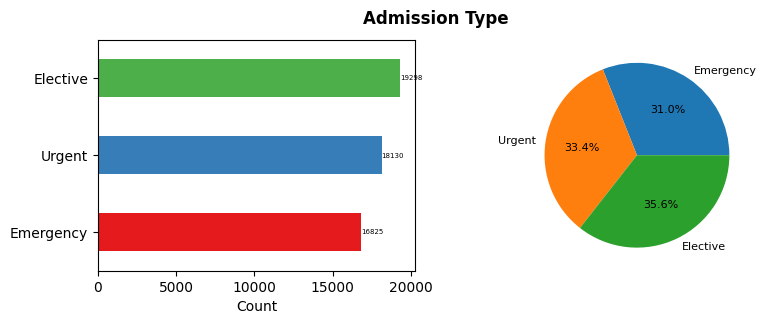

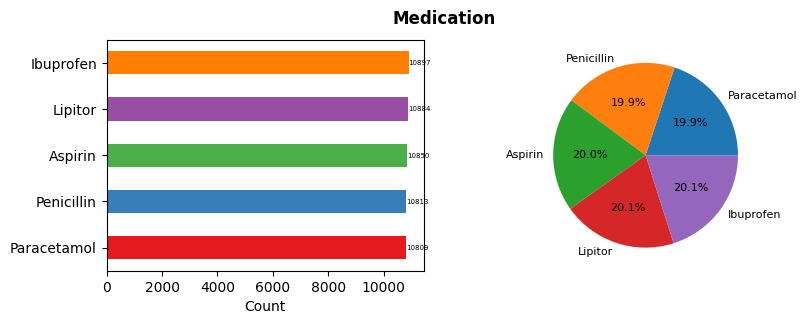

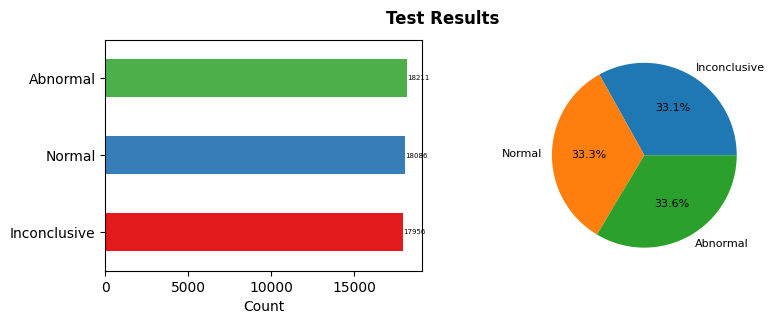

In [51]:
for col in healthcare.columns:
    if healthcare[col].dtype == 'O' and col != 'Doctor' and col!= 'Hospital':
        print('\n')
        fig,ax = plt.subplots(1,2,figsize = (9,3))
        fig.suptitle(col, fontsize = 12, weight = 'bold')
        plt.subplot(1,2,1)
        category_count = healthcare[col].value_counts().sort_values()
        category_count.plot(kind = 'barh',color= plt.cm.Set1.colors)
        for index,value in enumerate(category_count):
            plt.text(value,index,str(value),fontsize = 5,va = 'center')
        plt.xlabel('Count')
        plt.subplot(1,2,2)
        category_count.plot(kind = 'pie',
               labels = category_count.index,
               autopct = '%1.1f%%',
               textprops = {'fontsize':8})
        plt.ylabel('')
        plt.show()

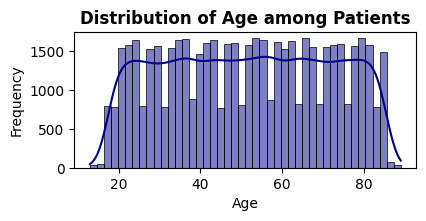

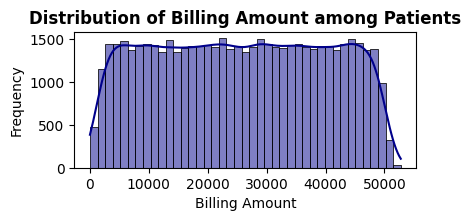

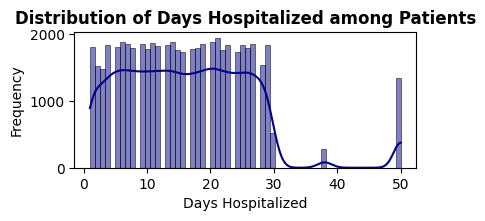

In [52]:
# Find the frequency of numeric columns
for col in healthcare.columns:
    if healthcare[col].dtype == 'int' or healthcare[col].dtype == 'float':
        plt.figure(figsize = (15,6))
        plt.subplot(3,3,3)
        sns.histplot(healthcare[col],kde = True,color = 'darkblue')
        plt.ylabel('Frequency',fontsize = 10)
        plt.xlabel(col,fontsize = 10)
        plt.title(f'Distribution of {col} among Patients',fontsize = 12,weight = 'bold')
        plt.show()

In [53]:
# Distribution of medical condtions between genders?
gender_medical = healthcare.groupby(['Medical Condition','Gender']).size().sort_values().unstack()
gender_medical

Gender,Female,Male
Medical Condition,,
Arthritis,4179,4127
Asthma,4025,4066
Cancer,4403,4427
Diabetes,5167,6217
Hypertension,4771,5632
Obesity,3373,3866


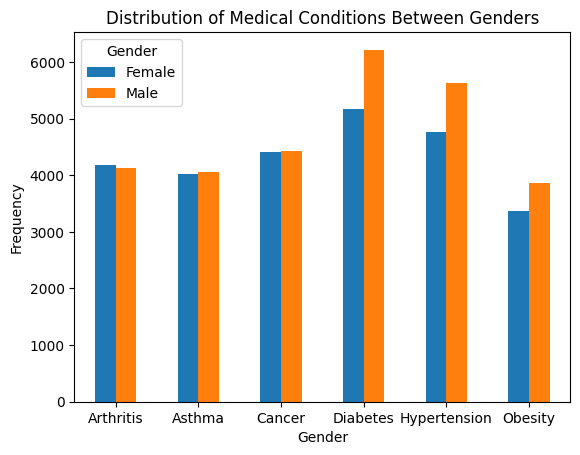

In [54]:
gender_medical.plot(kind = 'bar')
plt.title('Distribution of Medical Conditions Between Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

In [55]:
# Correlation between age, billing amount and days hospitalized
correlate_df = healthcare[['Age','Billing Amount','Days Hospitalized']]

# Encoding categorical columns for correlation
correlate_df['Gender'] = healthcare['Gender'].astype('category').cat.codes
correlate_df['Admission Type'] = healthcare['Admission Type'].astype('category').cat.codes
correlate_df['Test Results'] = healthcare['Test Results'].astype('category').cat.codes

# Correlation matrix
correlation_matrix = correlate_df.corr()
correlation_matrix

,Age,Billing Amount,Days Hospitalized,Gender,Admission Type,Test Results
Age,1.000000,-0.003061,0.006323,-0.000627,0.005049,-0.006424
Billing Amount,-0.003061,1.000000,-0.005654,0.005094,-0.003337,-0.003116
Days Hospitalized,0.006323,-0.005654,1.000000,0.018337,0.022475,0.001300
Gender,-0.000627,0.005094,0.018337,1.000000,0.010445,0.006194
Admission Type,0.005049,-0.003337,0.022475,0.010445,1.000000,-0.000670
Test Results,-0.006424,-0.003116,0.001300,0.006194,-0.000670,1.000000


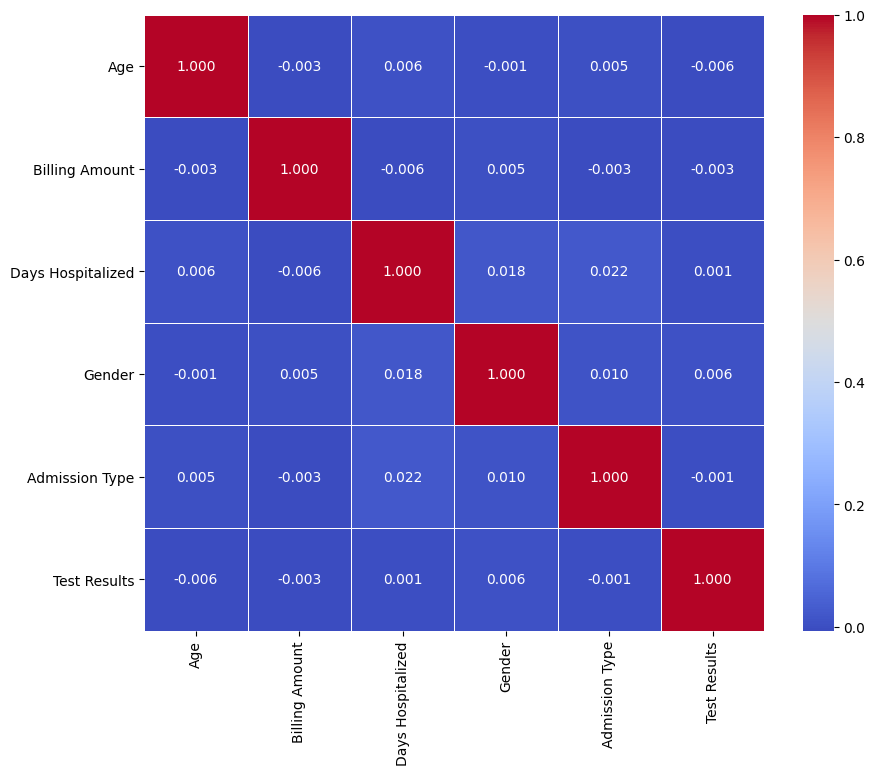

In [56]:
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm',fmt = '.3f',linewidths = 0.5)
plt.show()

## Findings

### What is the total billing amount for top 10 hospitals?

In [57]:
# Hospital with Top10 billing amount
top10_hospital_billing = healthcare.groupby(['Hospital'])['Billing Amount'].sum().sort_values(ascending = False)[:10].reset_index()
top10_hospital_billing

,Hospital,Billing Amount
0,Johnson PLC,1.081477e+06
1,LLC Smith,1.030190e+06
2,Smith PLC,1.029424e+06
3,Ltd Smith,1.003366e+06
4,Smith Ltd,9.700359e+05
5,Johnson Inc,9.369313e+05
6,Group Smith,9.029758e+05
7,Inc Brown,8.779613e+05
8,Inc Jones,8.049364e+05
9,Smith Group,8.019999e+05


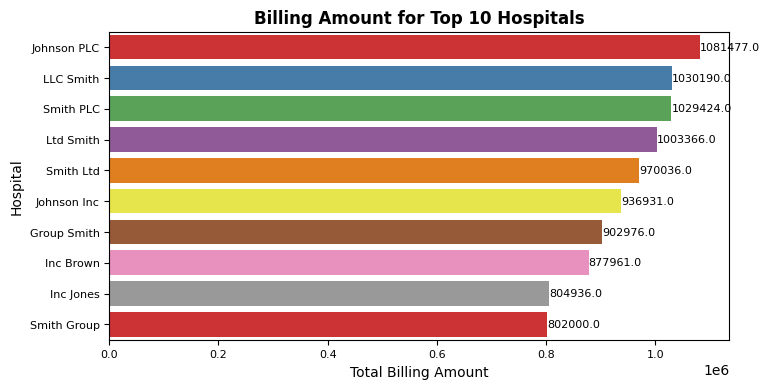

In [58]:
plt.figure(figsize=(8,4))
sns.barplot(x= top10_hospital_billing['Billing Amount'],
            y= top10_hospital_billing['Hospital'],
            palette="Set1")
for index,value in enumerate(top10_hospital_billing['Billing Amount']):
            plt.text(value,index,str(round(value,0)),fontsize = 8,va = 'center')
# Adding labels and title
plt.xlabel('Total Billing Amount',fontsize = 10)
plt.ylabel('Hospital',fontsize = 10)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.title('Billing Amount for Top 10 Hospitals',fontsize = 12, weight = 'bold')
plt.show()

### Who are the top 10 doctors by billing amount?

In [59]:
# Doctors with Top10 billing amount
top10_doctors_billing = healthcare.groupby(['Doctor'])['Billing Amount'].sum().sort_values(ascending = False)[:10].reset_index()
top10_doctors_billing

,Doctor,Billing Amount
0,Michael Smith,716837.960256
1,John Smith,610109.604176
2,Robert Smith,609160.688762
3,Robert Johnson,524193.003176
4,David Smith,473345.609187
5,William Johnson,469198.116031
6,James Smith,461953.619390
7,Michael Johnson,460819.038539
8,David Johnson,445605.542275
9,John Johnson,436541.162631


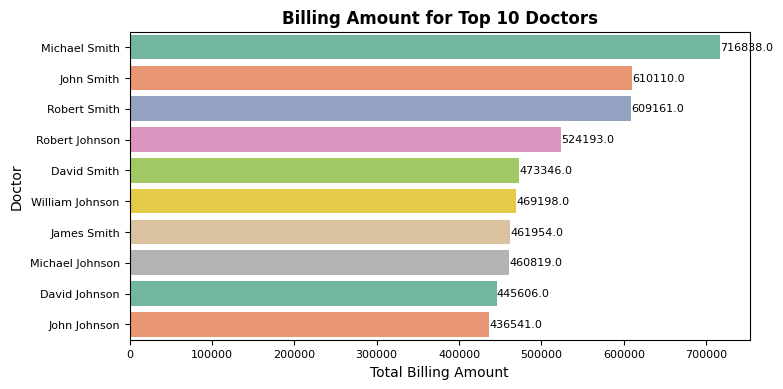

In [60]:
plt.figure(figsize=(8,4))
sns.barplot(x= top10_doctors_billing['Billing Amount'],
            y= top10_doctors_billing['Doctor'],
            palette="Set2")
for index,value in enumerate(top10_doctors_billing['Billing Amount']):
            plt.text(value,index,str(round(value,0)),fontsize = 8,va = 'center')
# Adding labels and title
plt.xlabel('Total Billing Amount',fontsize = 10)
plt.ylabel('Doctor',fontsize = 10)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.title('Billing Amount for Top 10 Doctors',fontsize = 12, weight = 'bold')
plt.show()

### Which medical condition generated the highest average billing among gender?

In [61]:
# Mean of billing amount of medical condition and gender 
medical_gender_billing = healthcare.groupby(['Medical Condition','Gender'])[['Billing Amount']].mean().reset_index()
medical_gender_billing

,Medical Condition,Gender,Billing Amount
0,Arthritis,Female,25359.093007
1,Arthritis,Male,25882.300573
2,Asthma,Female,25585.499206
3,Asthma,Male,25978.666958
4,Cancer,Female,25355.002683
5,Cancer,Male,25073.105161
6,Diabetes,Female,25523.615965
7,Diabetes,Male,25630.779112
8,Hypertension,Female,25634.520448
9,Hypertension,Male,25598.695070


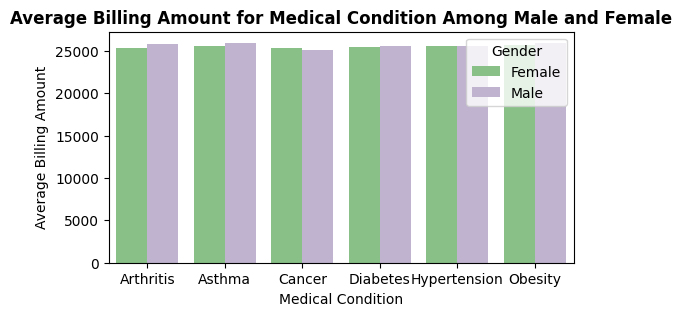

In [62]:
plt.figure(figsize=(6,3))
sns.barplot(x= medical_gender_billing['Medical Condition'],
            y= medical_gender_billing['Billing Amount'],
            hue = medical_gender_billing['Gender'],ci = None,
            palette="Accent")
plt.ylabel('Average Billing Amount',fontsize = 10)
plt.title('Average Billing Amount for Medical Condition Among Male and Female',fontsize = 12, weight = 'bold')
plt.show()

In [63]:
# Distribution of age groups
min_age = healthcare['Age'].min()
max_age = healthcare['Age'].max()
print(min_age,",",max_age)

13 , 89


In [64]:
healthcare['Age_Group'] = pd.cut(healthcare['Age'],bins = [18,30,40,50,60,70,80,float('inf')],
                                labels = ['18-30','31-40','41-50','51-60','61-70','71-80','Over 80'],
                                right = False)
Age_group = healthcare['Age_Group'].value_counts().sort_values(ascending = False)
Age_group

18-30      9374
51-60      8163
61-70      7993
31-40      7985
41-50      7932
71-80      7910
Over 80    4783
Name: Age_Group, dtype: int64

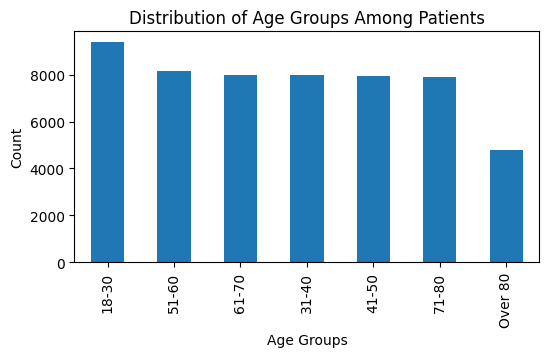

In [65]:
plt.figure(figsize=(6, 3))
Age_group.plot(kind = 'bar')
plt.title('Distribution of Age Groups Among Patients')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

### Which medical condition takes the highest average days hospitalized?

In [66]:
medical_hospitalized = healthcare.groupby(['Medical Condition'])['Days Hospitalized'].mean().sort_values(ascending = False).reset_index()
medical_hospitalized

,Medical Condition,Days Hospitalized
0,Diabetes,18.687193
1,Cancer,18.468177
2,Obesity,16.790164
3,Hypertension,14.567721
4,Asthma,14.058089
5,Arthritis,14.039128


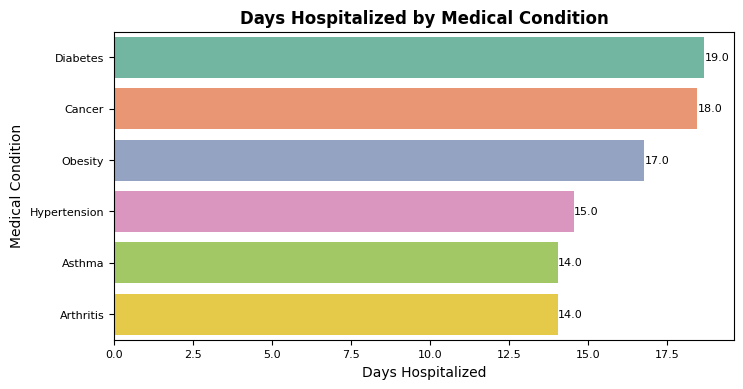

In [67]:
plt.figure(figsize=(8,4))
sns.barplot(x= medical_hospitalized['Days Hospitalized'],
            y= medical_hospitalized['Medical Condition'],
            palette="Set2")
for index,value in enumerate(medical_hospitalized['Days Hospitalized']):
            plt.text(value,index,str(round(value,0)),fontsize = 8,va = 'center')

plt.xlabel('Days Hospitalized',fontsize = 10)
plt.ylabel('Medical Condition',fontsize = 10)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.title('Days Hospitalized by Medical Condition',fontsize = 12, weight = 'bold')
plt.show()